In [146]:
from sklearn.cluster import KMeans, k_means, Birch, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
pd.set_option('display.max_columns', None)

In [99]:
df = pd.read_csv('./datasets/clean_planetary_data.csv')

In [100]:
df.head()

,Unnamed: 0,pl_name,hostname,disc_facility,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,pl_orbeccen,pl_insol,pl_eqt
0,0,11 Com b,11 Com,Xinglong Station,326.03000,1.29,12.1,1.08,6165.6000,19.40,0.231,98.09,1700.0
1,1,11 UMi b,11 UMi,Thueringer Landessternwarte Tautenburg,516.21997,1.53,12.3,1.09,4684.8142,14.74,0.080,98.09,1700.0
2,2,14 And b,14 And,Okayama Astrophysical Observatory,185.84000,0.83,12.9,1.15,1525.5000,4.80,0.000,98.09,1700.0
3,3,14 Her b,14 Her,W. M. Keck Observatory,1773.40002,2.93,12.9,1.15,1481.0878,4.66,0.370,98.09,1700.0
4,4,16 Cyg B b,16 Cyg B,Multiple Observatories,798.50000,1.66,13.5,1.20,565.7374,1.78,0.680,98.09,1700.0


In [101]:
df = df.drop(columns = 'Unnamed: 0')

In [102]:
ss = StandardScaler()
df_scaled = ss.fit_transform(df.drop(columns = ['pl_name','hostname','disc_facility']))

In [103]:
#trying a birch clustering model to see if our silhouette score can be improved
birch_model = Birch()

In [104]:
birch_model.fit(df_scaled)

Birch()

In [105]:
df['birch_labels'] = birch_model.labels_

df['birch_labels'].value_counts()

0    4340
1      10
2       4
Name: birch_labels, dtype: int64

In [106]:
birch_score = silhouette_score(df_scaled, birch_model.labels_, metric='euclidean')
birch_score
#our score is MUCH improved.  Love to see that.  We'll use these birch labels to build our classifier.

0.8910267342403563

In [107]:
df.head()

,pl_name,hostname,disc_facility,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,pl_orbeccen,pl_insol,pl_eqt,birch_labels
0,11 Com b,11 Com,Xinglong Station,326.03000,1.29,12.1,1.08,6165.6000,19.40,0.231,98.09,1700.0,0
1,11 UMi b,11 UMi,Thueringer Landessternwarte Tautenburg,516.21997,1.53,12.3,1.09,4684.8142,14.74,0.080,98.09,1700.0,0
2,14 And b,14 And,Okayama Astrophysical Observatory,185.84000,0.83,12.9,1.15,1525.5000,4.80,0.000,98.09,1700.0,0
3,14 Her b,14 Her,W. M. Keck Observatory,1773.40002,2.93,12.9,1.15,1481.0878,4.66,0.370,98.09,1700.0,0
4,16 Cyg B b,16 Cyg B,Multiple Observatories,798.50000,1.66,13.5,1.20,565.7374,1.78,0.680,98.09,1700.0,0


In [108]:
df[df['birch_labels'] == 1]

,pl_name,hostname,disc_facility,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,pl_orbeccen,pl_insol,pl_eqt,birch_labels
48,BD+20 2457 b,BD+20 2457,McDonald Observatory,379.630000,1.0500,11.60,1.030,17668.1697,55.59,0.15,98.09,546.0,1
3151,Kepler-470 b,Kepler-470,Kepler,24.669196,0.2322,14.44,1.288,35600.0000,112.00,0.00,41.20,1485.0,1
3152,Kepler-471 b,Kepler-471,Kepler,5.014235,0.0626,14.96,1.335,37000.0000,117.00,0.00,1146.88,1308.0,1
3170,Kepler-485 b,Kepler-485,Kepler,3.243260,0.0433,14.41,1.286,35500.0000,112.00,0.00,622.01,1243.0,1
3174,Kepler-488 b,Kepler-488,Kepler,3.120829,0.0428,15.79,1.409,39400.0000,124.00,0.00,778.51,1303.0,1
3183,Kepler-493 b,Kepler-493,Kepler,3.003877,0.0439,15.13,1.350,37500.0000,118.00,0.00,1414.33,1438.0,1
3480,Kepler-718 b,Kepler-718,Kepler,2.052350,0.0322,16.56,1.477,41600.0000,131.00,0.00,1324.20,1497.0,1
3649,Kepler-840 b,Kepler-840,Kepler,2.495780,0.0355,17.07,1.523,43000.0000,135.00,0.00,2258.80,1408.0,1
3667,Kepler-854 b,Kepler-854,Kepler,2.144633,0.0334,16.72,1.492,42000.0000,132.00,0.00,7282.96,1736.0,1
3985,PH2 b,PH2,Kepler,282.525500,0.8280,10.12,0.903,25426.4000,80.00,0.41,1.21,281.0,1


In [109]:
df[df['birch_labels'] == 2]

,pl_name,hostname,disc_facility,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,pl_orbeccen,pl_insol,pl_eqt,birch_labels
249,GU Psc b,GU Psc,Gemini Observatory,3.822000,2000.0,14.179,1.265,3591.30,11.3,0.109,100.77,1050.0,2
4109,USco1556 b,USco1556 A,Multiple Observatories,5840.000000,3500.0,12.300,1.090,4767.45,15.0,0.040,35.00,2240.0,2
4110,USco1621 b,USco1621 A,Multiple Observatories,5840.000000,2880.0,12.200,1.090,5085.28,16.0,0.040,35.00,2270.0,2
4294,WD 0806-661 b,WD 0806-661,Spitzer Space Telescope,1.407941,2500.0,12.600,1.130,2383.60,7.5,0.000,0.18,323.0,2


In [110]:
def planet_finder(planet_name):
    return df[df['pl_name'] == planet_name]

<AxesSubplot:ylabel='Frequency'>

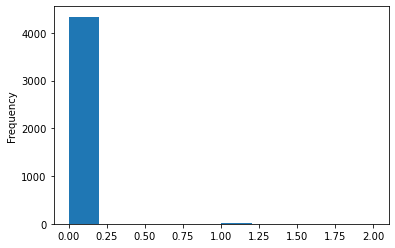

In [111]:
df['birch_labels'].plot(kind = 'hist')
#ok maybe birch sucks

In [176]:
df = df.drop(columns = 'birch_labels')

In [178]:
best_min = 0
best_score = 0.0
for n in range(5,300, 5):
    print(n)
    model = DBSCAN(min_samples = n, n_jobs = -1)
    model.fit(df_scaled)
    df['dbs_labels'] = model.labels_
    score = silhouette_score(df_scaled, model.labels_, metric = 'euclidean')
    if score > best_score:
        best_score = score
        best_min = n
    else:
        pass
print(best_score)
print(' ')
print(best_min)

5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
0.45921475861198074
 
10


[-1  0]


<AxesSubplot:ylabel='Frequency'>

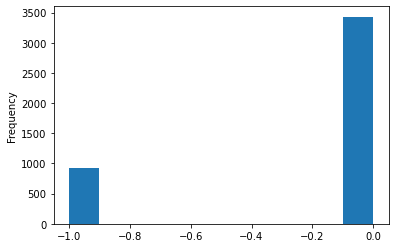

In [180]:
db_model = DBSCAN(min_samples = 10, n_jobs = -1)
db_model.fit(df_scaled)
df['dbs_labels'] = db_model.labels_
print(df['dbs_labels'].unique())
df['dbs_labels'].plot(kind = 'hist')
#I don't think DBScan is doing me any good either here.  

In [181]:
df = df.drop(columns = 'dbs_labels')

In [119]:
#Let's go back to just K-Means, and apply both a manual gridsearch and some elbow plots to 
#find the ideal value of n_clusters.
best_n = 0
best_score = 0.0
for n in range(5,300, 5):
    print(n)
    model = KMeans(n_clusters = n)
    model.fit(df_scaled)
    score = silhouette_score(df_scaled, model.labels_, metric = 'euclidean')
    if score > best_score:
        best_score = score
        best_min = n
    else:
        pass
print(best_score)
print(' ')
print(best_min)

5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
0.5263909610813713
 
5


In [153]:
#elbow code from https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 20)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(df_scaled)
    kmeanModel.fit(df_scaled)
    distortions.append(sum(np.min(cdist(df_scaled, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / df_scaled.shape[0])
    inertias.append(kmeanModel.inertia_)
    mapping1[k] = sum(np.min(cdist(df_scaled, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / df_scaled.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [154]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 2.107785471517363
2 : 1.4994449000994285
3 : 1.4440827715188813
4 : 1.420080772973878
5 : 1.4070346871495532
6 : 1.3177066937431623
7 : 1.2200839772598095
8 : 1.10486521930221
9 : 1.0516777609847419
10 : 1.03708828796609
11 : 1.0060061272977783
12 : 0.9628292836493589
13 : 0.9510147597738426
14 : 0.9004600853800261
15 : 0.8624977663239978
16 : 0.8399667869140617
17 : 0.816125323019007
18 : 0.8024542889546818
19 : 0.8021195561837358


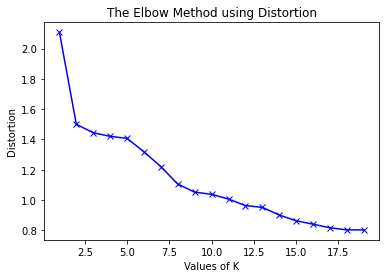

In [155]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [156]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 39185.99999999997
2 : 28995.222845657634
3 : 22742.424662919773
4 : 19186.41260141339
5 : 16368.802150224086
6 : 13912.635335294472
7 : 11887.645960327729
8 : 10693.361433047037
9 : 9761.429233516445
10 : 8909.034613755346
11 : 8155.765684633115
12 : 7633.650703383035
13 : 7070.528749006858
14 : 6586.303049936591
15 : 6244.014099815759
16 : 5862.099044386364
17 : 5557.177753636104
18 : 5345.6138928247465
19 : 5209.648603042294


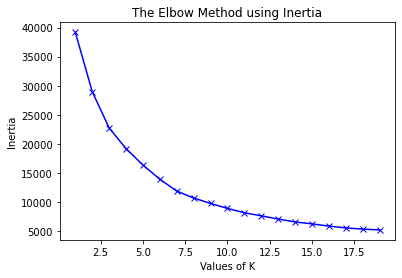

In [157]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

Between the k-means gridsearch, the Distortion elbow method, and the Inertia elbow method, it appears that a K-means 'n_clusters' parameter of 7 will perform the best.

In [158]:
model = KMeans(n_clusters= 7)
model.fit(df_scaled)
df['k_labels'] = model.labels_


In [183]:
df.k_labels.value_counts()

1    2939
3     866
0     351
6     184
2       9
5       4
4       1
Name: k_labels, dtype: int64

This is the best I've gotten.  A few outlier planets that refuse to be incorporated, and that 0 cluster is super big.  But maybe there's still some truth to this.  I'll examine these clusters to see what separates them all from one another.  If it's meaningful, then I can reject my null hypothesis ('ML Clustering cannot find meaningful new categories that were unknown beforehand').  If the clusters are meaningless, then I fail to reject my null hypothesis.

In [186]:
df.head()

,pl_name,hostname,disc_facility,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,pl_orbeccen,pl_insol,pl_eqt,k_labels
0,11 Com b,11 Com,Xinglong Station,326.03000,1.29,12.1,1.08,6165.6000,19.40,0.231,98.09,1700.0,0
1,11 UMi b,11 UMi,Thueringer Landessternwarte Tautenburg,516.21997,1.53,12.3,1.09,4684.8142,14.74,0.080,98.09,1700.0,3
2,14 And b,14 And,Okayama Astrophysical Observatory,185.84000,0.83,12.9,1.15,1525.5000,4.80,0.000,98.09,1700.0,3
3,14 Her b,14 Her,W. M. Keck Observatory,1773.40002,2.93,12.9,1.15,1481.0878,4.66,0.370,98.09,1700.0,0
4,16 Cyg B b,16 Cyg B,Multiple Observatories,798.50000,1.66,13.5,1.20,565.7374,1.78,0.680,98.09,1700.0,0


In [184]:
df[df['k_labels'] == 3].describe()

,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,pl_orbeccen,pl_insol,pl_eqt,k_labels
count,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.0
mean,547.345597,7.410256,13.443642,1.199678,711.348591,2.236977,0.073677,415.378279,1228.228637,3.0
std,1168.301455,53.461824,2.479686,0.221135,977.609395,3.074225,0.084264,522.917258,519.887007,0.0
min,0.090706,0.004400,6.277000,0.560000,0.640000,0.002010,0.000000,0.160000,55.000000,3.0
25%,3.429995,0.045805,12.416500,1.110000,187.519700,0.590000,0.000000,94.970000,840.000000,3.0
50%,8.653877,0.090350,13.300000,1.190000,357.708715,1.125500,0.042000,132.260000,1227.000000,3.0
75%,527.275000,1.560000,14.100000,1.251000,762.798000,2.400000,0.126000,580.332500,1623.750000,3.0
max,8619.900000,800.000000,33.600000,3.000000,8654.150000,27.230000,0.340000,2340.000000,2782.000000,3.0


In [ ]:
#our second-most prominent class:  

In [185]:
df[df['k_labels'] == 0].describe()

,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,pl_orbeccen,pl_insol,pl_eqt,k_labels
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.0
mean,2170.794618,15.505426,12.156197,1.084783,1821.470372,5.734810,0.455963,264.022593,934.259259,0.0
std,5935.712606,90.129835,2.590598,0.231260,2155.517661,6.784467,0.184080,486.459116,483.764250,0.0
min,0.719573,0.016600,1.160000,0.103000,1.640000,0.005160,0.081000,0.060000,55.000000,0.0
25%,56.562695,0.458250,12.150000,1.080000,332.132350,1.045000,0.340000,65.300000,690.000000,0.0
50%,532.580000,1.393000,12.700000,1.130000,1018.327320,3.204000,0.406000,98.090000,883.000000,0.0
75%,1741.415000,3.425000,13.300000,1.185000,2657.058800,8.360000,0.575000,196.510000,1150.000000,0.0
max,69000.000000,1100.000000,30.488000,2.720000,17668.169700,55.590000,0.950000,3440.000000,2700.000000,0.0


In [164]:
df[df['k_labels'] == 6].describe()

,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,pl_orbeccen,pl_insol,pl_eqt,birch_labels,k_labels
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.0,184.0
mean,96.982991,0.256776,6.941739,0.619125,285.617017,0.898653,0.057665,3619.290272,1749.048913,0.0,6.0
std,264.274683,0.557782,6.713994,0.598817,681.766772,2.145075,0.102049,2203.364449,551.293643,0.0,0.0
min,0.355007,0.008900,0.610000,0.054000,0.165000,0.000520,0.000000,833.590000,185.000000,0.0,6.0
25%,1.220766,0.021975,1.322250,0.118000,2.307500,0.007263,0.000000,2718.285000,1612.500000,0.0,6.0
50%,2.773502,0.041735,2.628000,0.234500,8.275000,0.026035,0.000000,3288.710000,1845.000000,0.0,6.0
75%,13.674875,0.098000,13.750000,1.225000,316.797053,0.996750,0.074500,3742.155000,2128.000000,0.0,6.0
max,1378.000000,2.510000,22.978000,2.050000,5689.157000,17.900000,0.494000,25339.900000,3186.000000,0.0,6.0


In [165]:
df[df['k_labels'] == 2].describe()

,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,pl_orbeccen,pl_insol,pl_eqt,birch_labels,k_labels
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.0,9.0
mean,36.474406,0.150433,15.022222,1.340333,37447.377778,117.888889,0.045556,1652.233333,1299.888889,1.0,2.0
std,92.550831,0.261915,2.085400,0.186023,5297.722330,16.609067,0.136667,2225.945046,408.583053,0.0,0.0
min,2.052350,0.032200,10.120000,0.903000,25426.400000,80.000000,0.000000,1.210000,281.000000,1.0,2.0
25%,2.495780,0.035500,14.440000,1.288000,35600.000000,112.000000,0.000000,622.010000,1303.000000,1.0,2.0
50%,3.120829,0.043300,15.130000,1.350000,37500.000000,118.000000,0.000000,1146.880000,1408.000000,1.0,2.0
75%,5.014235,0.062600,16.560000,1.477000,41600.000000,131.000000,0.000000,1414.330000,1485.000000,1.0,2.0
max,282.525500,0.828000,17.070000,1.523000,43000.000000,135.000000,0.410000,7282.960000,1736.000000,1.0,2.0


In [168]:
df[df['k_labels'] == 5].describe()

,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,pl_orbeccen,pl_insol,pl_eqt,birch_labels,k_labels
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.00000,4.000000,4.000000,4.0,4.0
mean,2921.307485,2720.000000,12.819750,1.143750,3956.907500,12.45000,0.04725,42.737500,1470.750000,2.0,5.0
std,3370.215962,632.666315,0.921969,0.083004,1230.063545,3.86997,0.04528,42.026379,953.048923,0.0,0.0
min,1.407941,2000.000000,12.200000,1.090000,2383.600000,7.50000,0.00000,0.180000,323.000000,2.0,5.0
25%,3.218485,2375.000000,12.275000,1.090000,3289.375000,10.35000,0.03000,26.295000,868.250000,2.0,5.0
50%,2921.911000,2690.000000,12.450000,1.110000,4179.375000,13.15000,0.04000,35.000000,1645.000000,2.0,5.0
75%,5840.000000,3035.000000,12.994750,1.163750,4846.907500,15.25000,0.05725,51.442500,2247.500000,2.0,5.0
max,5840.000000,3500.000000,14.179000,1.265000,5085.280000,16.00000,0.10900,100.770000,2270.000000,2.0,5.0


In [167]:
df[df['k_labels'] == 4]

,pl_name,hostname,disc_facility,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,pl_orbeccen,pl_insol,pl_eqt,birch_labels,k_labels
1021,HR 8799 b,HR 8799,Gemini Observatory,170000.0,68.0,13.0,1.2,2000.0,7.0,0.5,54.1,1200.0,0,4


In [170]:
df[df['k_labels'] == 1].describe()

,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,pl_orbeccen,pl_insol,pl_eqt,birch_labels,k_labels
count,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.0,2939.0
mean,54.372923,0.170910,2.433323,0.217168,26.121516,0.082187,0.030123,180.797863,787.504934,0.0,1.0
std,355.036242,0.351558,1.355350,0.120850,235.116647,0.739784,0.070616,286.674964,337.802390,0.0,0.0
min,0.179715,0.005800,0.296000,0.026000,0.020000,0.000060,0.000000,0.070000,50.000000,0.0,1.0
25%,5.491243,0.057550,1.530000,0.136000,3.050000,0.009610,0.000000,16.835000,533.000000,0.0,1.0
50%,11.609257,0.096000,2.180000,0.194000,5.690000,0.017900,0.000000,68.970000,750.000000,0.0,1.0
75%,25.864083,0.168450,2.860000,0.255000,9.270000,0.029250,0.000000,200.000000,980.000000,0.0,1.0
max,10140.000000,10.260000,10.150000,0.906000,5994.020000,18.860000,0.478000,2144.310000,2271.000000,0.0,1.0


In [171]:
#51 Peg b is the first gas giant ever found orbiting a sun-like star
planet_finder('51 Peg b')

,pl_name,hostname,disc_facility,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,pl_orbeccen,pl_insol,pl_eqt,birch_labels,k_labels
25,51 Peg b,51 Peg,Haute-Provence Observatory,4.230785,0.0527,14.3,1.27,146.2018,0.46,0.013,98.09,700.0,0,3


In [172]:
#HAT-P-26 b is a neptune-like planet, gaseus and filled with mostly hydrogen and helium
planet_finder('HAT-P-26 b')

,pl_name,hostname,disc_facility,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,pl_orbeccen,pl_insol,pl_eqt,birch_labels,k_labels
273,HAT-P-26 b,HAT-P-26,HATNet,4.23452,0.0479,7.062,0.63,22.2481,0.07,0.12,433.0,1001.0,0,1


In [173]:
#55 Cancri e is a super-earth: rocky and massive
planet_finder('55 Cnc e')

,pl_name,hostname,disc_facility,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,pl_orbeccen,pl_insol,pl_eqt,birch_labels,k_labels
29,55 Cnc e,55 Cnc,McDonald Observatory,0.736547,0.01544,1.875,0.167,7.99,0.02514,0.05,98.09,1958.0,0,1


In [174]:
#terrestrial planet TRAPPIST-1 e
planet_finder('TRAPPIST-1 e')

,pl_name,hostname,disc_facility,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,pl_orbeccen,pl_insol,pl_eqt,birch_labels,k_labels
4088,TRAPPIST-1 e,TRAPPIST-1,Multiple Observatories,6.099615,0.02817,0.918,0.082,0.62,0.00195,0.085,0.66,251.0,0,1
